In [2]:
import math
import numpy as np
import Simulation as sim
from graphs import Graph
from UCB1 import UCB1
from UCB import UCB
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from DUCB import DUCB
print("session started")

session started


deterministic case of UCB with two arms analysis:
Im trying to analyze the sequence of differences between times that the algorithm picked the wrong arm.
Is it strictly increasing? No
Is it at least increasing? No
BUT it becomes strictly increasing pretty fast.
Example: horizon = $10^7$, alg = UCB1(2, 2), arms0 = [0.3, 0.6]
The last element that interrupts the strict monotonicity is at 92, and for non strict monotonicity is at 40. The worse arm was picked 354 times.

In [38]:
alg = UCB1(2, 2)
horizon = 10000000
N = 1
arms0 = [0.3, 0.6]
change_times = []
change_values = [[]]

In [43]:
def extract_data(path):
    """
    :param path: path to file with pickled data
    :return: data, change_times, change_values
    """
    with open(path, 'rb') as file:
        d, ct, cv = pickle.load(file)
        return d, ct, cv

In [44]:
data, change_times, change_values = extract_data("simulations/10000000_[1]")

In [34]:
# data, _, _ = sim.run_simulation(horizon, initial_arms=arms0, N=N, changes_times=change_times,
#                                 changes_values=change_values, save=True, algo=alg, deterministic=True)

In [45]:
g = Graph(data, change_times, change_values, len(arms0), N)

plot cumulative count


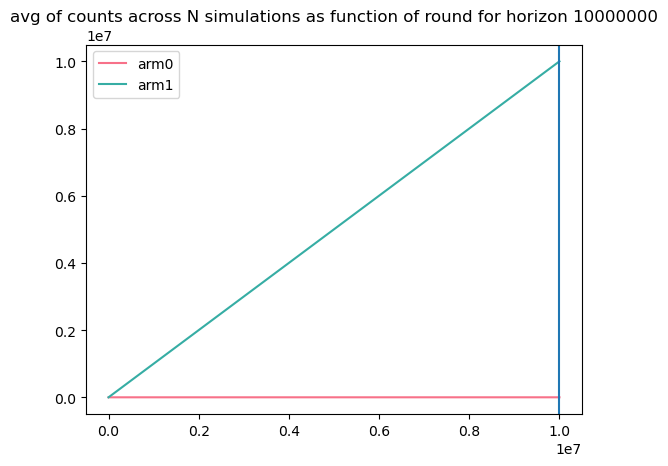

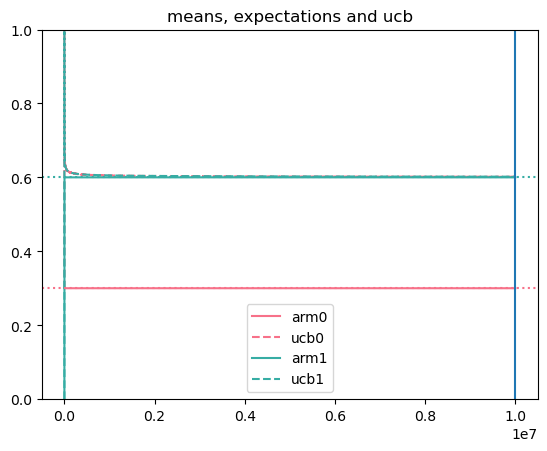

In [47]:
g.plot_cumulative_count()
g.plot_means()

In [48]:
wrong_arm_picked_list = g.wrong_arm_picked_list()

In [49]:
print(g.calculate_regret())
print(wrong_arm_picked_list)
print(len(wrong_arm_picked_list))
differences = [wrong_arm_picked_list[i] - wrong_arm_picked_list[i - 1] for i in range(1, len(wrong_arm_picked_list))]
print(differences)


106.2
[0, 3, 6, 9, 12, 15, 19, 23, 26, 30, 35, 39, 44, 48, 53, 58, 64, 69, 75, 80, 86, 93, 99, 106, 113, 120, 127, 135, 142, 150, 159, 167, 176, 185, 194, 204, 214, 224, 235, 245, 257, 268, 280, 292, 304, 317, 330, 344, 358, 372, 387, 402, 418, 434, 450, 467, 485, 503, 521, 540, 560, 580, 600, 621, 643, 665, 688, 712, 736, 761, 787, 813, 840, 868, 896, 926, 956, 987, 1018, 1051, 1085, 1119, 1154, 1191, 1228, 1267, 1306, 1347, 1388, 1431, 1475, 1520, 1567, 1614, 1663, 1714, 1766, 1819, 1873, 1929, 1987, 2046, 2107, 2170, 2234, 2301, 2369, 2438, 2510, 2584, 2660, 2738, 2818, 2900, 2985, 3072, 3162, 3254, 3348, 3446, 3546, 3649, 3754, 3863, 3975, 4090, 4208, 4330, 4455, 4584, 4716, 4852, 4992, 5136, 5285, 5437, 5594, 5756, 5922, 6093, 6269, 6450, 6636, 6828, 7026, 7229, 7438, 7654, 7875, 8104, 8339, 8581, 8830, 9087, 9351, 9624, 9904, 10193, 10491, 10797, 11113, 11439, 11774, 12119, 12476, 12843, 13221, 13611, 14013, 14427, 14854, 15294, 15748, 16216, 16699, 17197, 17710, 18240, 18786, 19

In [50]:
wrong_arm_picked_list[301]

1187032

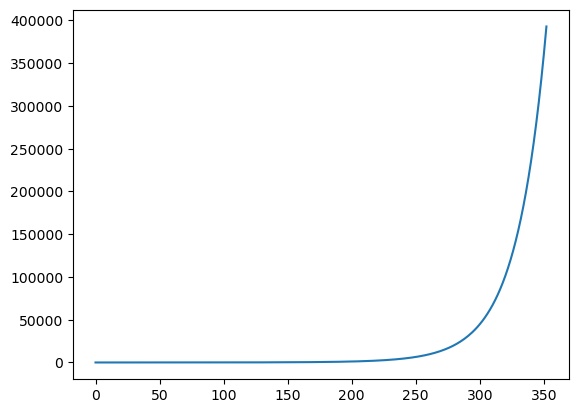

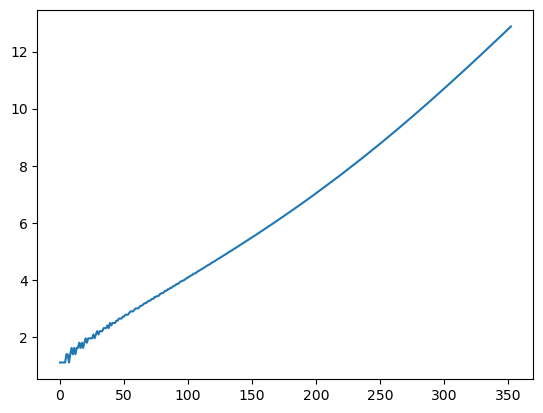

In [51]:
import numpy as np
plt.plot(range(len(differences)), differences)
plt.show()
plt.plot(range(len(differences)), np.log(differences))
plt.show()

In [52]:
def is_increasing(lst, strictly=False):
    flag = True
    last = 0
    for i in range(1, len(lst)):
        if lst[i] <= lst[i - 1] and strictly:
            flag = False
            last = i
        if lst[i] < lst[i - 1] and not strictly:
            flag = False
            last = i
    return flag, last

In [53]:
print(is_increasing(differences))
print(is_increasing(differences, True))

(False, 40)
(False, 92)


Ideas todo next:
- plot graph of is_increasing (the last round that the sequence in not increasing) depending on the difference between the arms values
- plot graph of count of picking the wrong arm depending on the: horizon, difference between arms

plot cumulative count


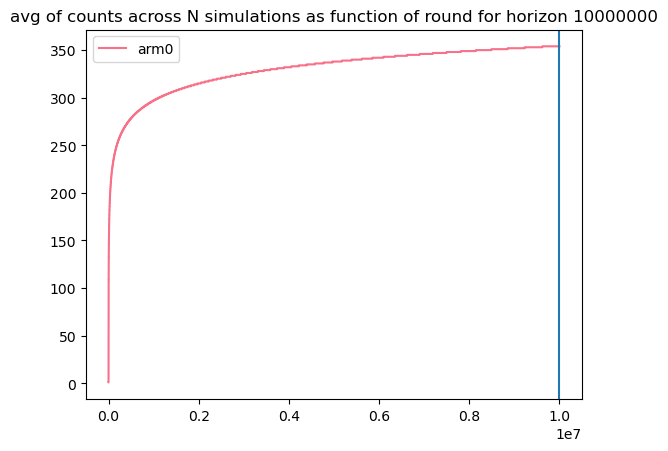

In [54]:
g.plot_cumulative_count([0])

doing graphs that depend to difference for $horizon = 10^6$

In [ ]:
from tqdm import tqdm
differences_list = [0.05 + i * 0.05 for i in range(int((0.9 - 0.05) / 0.05) + 1)]
last_decrease = []
last_strictly_decrease = []
counts = []
for difference in tqdm(differences_list):
    data, change_times, change_values = sim.run_simulation(1000000, initial_arms=[0.9-difference,0.9], N=1, changes_times=[],
                            changes_values=[[]], save=False, algo=alg, deterministic=True)
    g = Graph(data, change_times, change_values, 2, 1)
    wrong_picked_list = g.wrong_arm_picked_list()
    differences = [wrong_picked_list[i] - wrong_picked_list[i - 1] for i in range(1, len(wrong_picked_list))]
    last_strictly_decrease.append(is_increasing(differences)[1])
    last_decrease.append(is_increasing(differences, True)[1])
    counts.append(len(wrong_picked_list))

plt.plot(differences_list, last_decrease)
plt.title("last time a_n+1 <= a_n as function of difference")
plt.show()
plt.plot(differences_list, last_strictly_decrease)
plt.title("last time a_n+1 < a_n as function of difference")
plt.show()
plt.plot(differences_list, counts)
plt.title("wrong arm picked count asa function of difference")
plt.show()

In [ ]:
print(f"counts = {counts}")
print(f"last_decrease = {last_decrease}")
print(f"last_strictly_decrease = {last_strictly_decrease}")

In this code I plot the total number of times the worse arm was picked as function of the horizon

In [ ]:
horizon_range = range(1, 10000)
for difference in [0.5, 0.3, 0.1]:
    counts_per_horizon = []
    init_arms = [0.9-difference,0.9]
    for h in tqdm(horizon_range):
        data, change_times, change_values = sim.run_simulation(h, initial_arms=init_arms, N=1, changes_times=[],
                            changes_values=[[]], save=False, algo=alg, deterministic=True)
        counts_per_horizon.append(data["c0"].iloc[-1])
    plt.plot(horizon_range, counts_per_horizon, label=f"{init_arms}")
    plt.title(f"counts per horizon for arms: {init_arms}")
    plt.show()

In [ ]:
import numpy as np

plt.plot(horizon_range, counts_per_horizon, label="counts")
plt.plot(horizon_range, 50*np.log(horizon_range), label="log")
plt.legend()
plt.show()

In [ ]:
with open(f"simulations/counts_per_horizon_arms[0.8,0.9]", 'wb') as file:
    pickle.dump(counts_per_horizon, file)

Lets see how long it take for UCB to reach steady state. for every epsilon we find the minimum horizon such that at the last round the difference of ucb values of the arms is smaller then epsilon. Maybe for small enough epsilon they will never be as close? I mean maybe
$\exists \epsilon$ s.t $\forall t$ $|UCB_1-UCB_2|>\epsilon$
Actually this question is not that interesting because we know that there is always a time when the worse arm gets bigger then the better arm.

In [ ]:
data, change_times, change_values = extract_data("simulations/10000000_[1]")

In [ ]:
min_difference = min(abs(data['ucb1'] - data['ucb0']))
print(min_difference)

the min difference gets really small. lets plot the min difference as function of the horizon

In [ ]:
xrange = range(len(data))
min_differences = []
abs_diff = abs(data['ucb1'] - data['ucb0']).tolist()
new_min = abs_diff[0]
for i in xrange:
    if new_min > abs_diff[i]:
        new_min = abs_diff[i]
    min_differences.append(new_min)

In [ ]:
plt.plot(xrange, min_differences)
plt.show()

In [ ]:
min_differences

In [ ]:
plt.plot(xrange, np.log(min_differences))
plt.show()

looks like it's getting exponentially small with long periods where it don't get smaller (or maybe the computer can't be as precise).
actually, maybe the periods make sense because every time the ucb picks the wrong arms the ucbs get further apart.

In [ ]:
plt.plot(np.log(xrange), np.log(data["ucb0"]), label="arm0")
plt.plot(np.log(xrange), np.log(data["ucb1"]), label="arm1")
plt.legend()
plt.show()

In [ ]:
import math
start = math.ceil(0.5*len(data))
plt.plot(np.log(xrange[start:]), np.log(data["ucb0"][start:]), label="arm0")
plt.plot(np.log(xrange[start:]), np.log(data["ucb1"][start:]), label="arm1")
plt.legend()
plt.show()

every time there is a switch it takes exponential time to recover. The drop in the ucb seems pretty consistent, like if we connect the line above and bellow they are parallel and following the curve of ucb1. We can also see that the ucb of arm0 is growing faster then ucb1 is decreasing.

I tried some stuff at desmos looking at the functions:
$f(t)=\sqrt{\frac{2ln(T+t)}{c_2}}$
$g(t)=\sqrt{\frac{2ln(T+t)}{c_1+t}}$

I tried to see how long it takes f(t) to get bigger than some value d. You can actually calculate it to be:
$f(t)>d \Longrightarrow t>exp({\frac{c_2d^2}{2}})-T$

I tried to see how long it takes g(t) to get smaller than some value d.

$g(t)<d \Longrightarrow T+t<exp(\frac{d^2}{2} (c1+t))=exp(\frac{d^2}{2} (T+t-c_2))$

This seems a little weird because g is already very small, but remember that d is also very small. let's see how small:

In [ ]:
max_difference = max(abs(data['ucb1'][start:] - data['ucb0'][start:]))
print(max_difference)

putting the data to desmos we see that it takes t = 10^7~8 approximately for g to be less than 0.000446

In [ ]:
data, change_times, change_values = sim.run_simulation(100000, initial_arms=[0.3,0.6], N=1, changes_times=[0.8],
                        changes_values=[[0.6,0.3]], save=False, algo=alg, deterministic=True)

g = Graph(data, change_times, change_values, 2, 1)

In [ ]:
g.

In [ ]:
g.plot_means()

In [ ]:
g.plot_cumulative_count()

In [ ]:
data, change_times, change_values = sim.run_simulation(100000, initial_arms=[0.3,0.6], N=1, changes_times=[0.1, 0.3, 0.5, 0.7],
                        changes_values=[[0.6,0.3], [0.3,0.6], [0.6,0.3], [0.3,0.6]], save=False, algo=alg, deterministic=True)

g = Graph(data, change_times, change_values, 2, 1)

In [ ]:
g.plot_means()

In [ ]:
g.plot_cumulative_count()

## Different behaviors only from the change values:

The following two simulations show different behaviors of the ucb when the only difference between the simulation was that in the first one, the arms switch their values and in the second one, the first arm stays the same and the worse arm gets better. In both cases the at the second change point the arms return to the original distribution.

In [39]:
data, change_times, change_values = sim.run_simulation(10000, initial_arms=[0.7,0.3], N=1, changes_times=[0.3, 0.5],
                        changes_values=[[0.3,0.7], [0.7,0.3]], save=False, algo=alg, deterministic=True)

g = Graph(data, change_times, change_values, 2, 1)

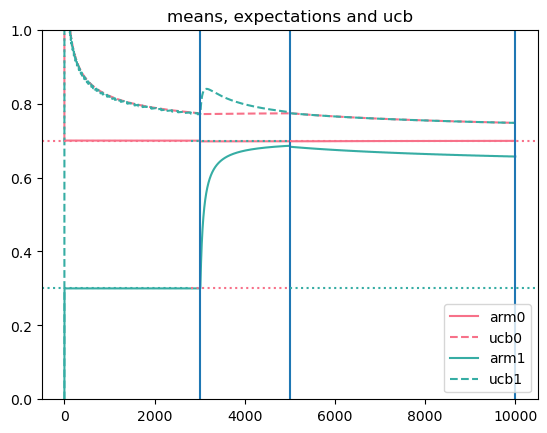

plot cumulative count


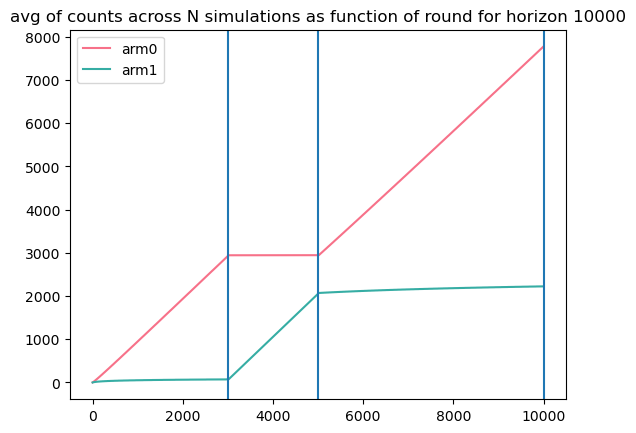

In [40]:
g.plot_means()
g.plot_cumulative_count()

plot cumulative count


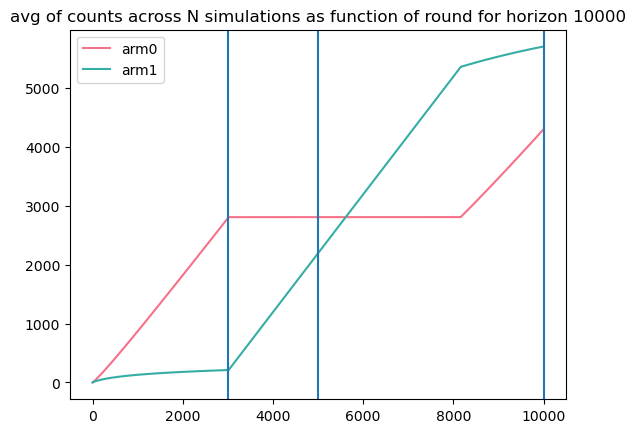

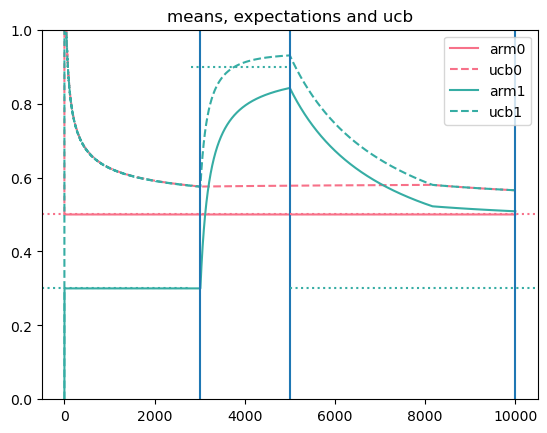

In [41]:
data, change_times, change_values = sim.run_simulation(10000, initial_arms=[0.5, 0.3], N=1, changes_times=[0.3, 0.5],
                        changes_values=[[0.5, 0.9], [0.5, 0.3]], save=False, algo=alg, deterministic=True)

g = Graph(data, change_times, change_values, 2, 1)
g.plot_cumulative_count()
g.plot_means()

I think the difference between the simulations can be explained by the fact that in the second one, the new value of the worse arm was larger than the previous value of the better arm. The change in the better arm probably doesn't really matter, but this makes me think that if the difference between the new value of the worse arm and the starting value of the better is 0, than it is a special case and the ucb can adapt pretty fast in this case. We see that ucb reacts to the first change fairly quickly, (although from the papers I read, different algorithm can do even this a little better) because the ucb values when ucb stabilizes are very close to each other. So after the first change is detected quickly, if the difference is 0, then the ucbs remain close so the second change can happen fast as well.

Let's see what happens if the difference isn't 0 but really close to 0:

plot cumulative count


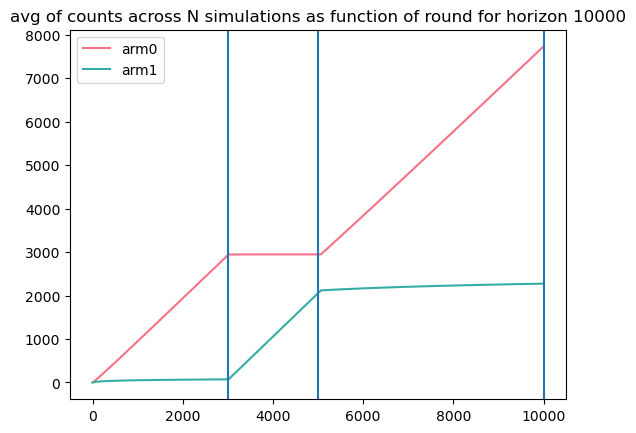

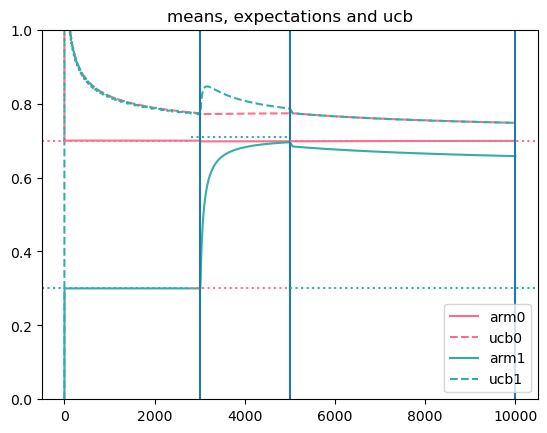

In [42]:
data, change_times, change_values = sim.run_simulation(10000, initial_arms=[0.7,0.3], N=1, changes_times=[0.3, 0.5],
                        changes_values=[[0.3,0.71], [0.7,0.3]], save=False, algo=alg, deterministic=True)

g = Graph(data, change_times, change_values, 2, 1)
g.plot_cumulative_count()
g.plot_means()

I developed this inequality in my notability note called "Deterministic case":
$\frac{ln(t)}{N_2}>\frac{ln(t+2)}{N_2+1}$
for t that holds this inequality, after picking the wrong arm, in the next round the correct arm will be picked.
I think this inequality can only be solved numerically, so I want to draw the plot of the solution depending on $N_2$

In [34]:
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt

result = []
for N in range(1, 1000):
    function = lambda t: np.log(t)/N - np.log(t+2)/(N+1)
    x0 = 2*N-0.5
    r = root_scalar(function, bracket=[1, 2*N])
    if r.converged:
        result.append(r.root)
    else:
        print(f"did not converge N={N}")
        result.append(None)

print(result)

[2.0, 2.875129794162784, 3.678573510428323, 4.433753265686575, 5.153397194717206, 5.845351580519086, 6.514870680898104, 7.165685030882542, 7.800561326041821, 8.421621869864548, 9.030539060147072, 9.628660026220533, 10.217089893736429, 10.796749357721746, 11.368415661193344, 11.932752492651396, 12.490332269905547, 13.041653061693973, 13.587151650071572, 14.127213761668562, 14.66218218638545, 15.192363295527693, 15.718032330520689, 16.2394377354888, 16.756804737774523, 17.270338330771366, 17.780225777234712, 18.28663872449931, 18.789735003057878, 19.289660164861942, 19.786548806185046, 20.280525711003015, 20.77170684394465, 21.260200216444197, 21.74610664544869, 22.22952042062372, 22.710529893269268, 23.189217997952113, 23.665662716072145, 24.139937489115926, 24.612111588156882, 25.082250445164803, 25.550415950871933, 26.016666723253334, 26.48105835011462, 26.943643608788904, 27.404472665549658, 27.86359325699406, 28.321050855364184, 28.776888819519886, 29.23114853306898, 29.683869530970

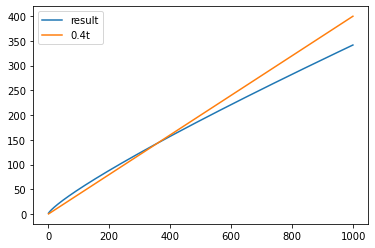

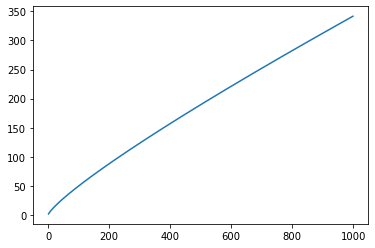

In [37]:
plt.plot(range(1,1000), result, label="result")
plt.plot(range(1,1000), 0.4*np.array(range(1,1000)), label="0.4t")
plt.legend()
plt.show()
plt.plot(range(1,1000), result, label="result")
plt.show()

it is pretty close to 0.4t

In [38]:
for t in range(999):
    if t < result[t]:
        print(t)

0
1
2
3
4
5
6
7


I'm just curious to see if this continuous to be a straight line for more values of t.

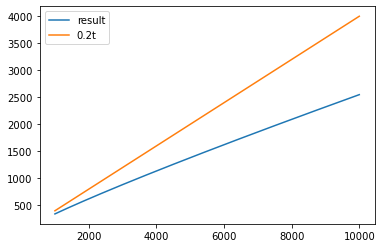

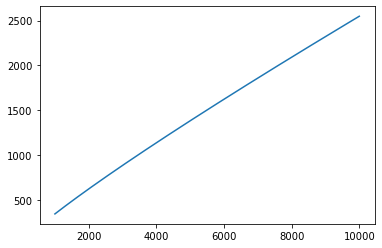

In [40]:
trange = range(1000, 10000)
tres = []
for N in trange:
    function = lambda t: np.log(t)/N - np.log(t+2)/(N+1)
    x0 = 2*N-0.5
    r = root_scalar(function, bracket=[1, 2*N])
    if r.converged:
        tres.append(r.root)
    else:
        print(f"did not converge N={N}")
        tres.append(None)

plt.plot(trange, tres, label="result")
plt.plot(trange, 0.4*np.array(trange), label="0.2t")
plt.legend()
plt.show()
plt.plot(trange, tres, label="result")
plt.show()

I proved that equation 2 from my notes holds. Lets try to analyze the equation in a similar way.
$\sqrt{\frac{2ln(t_k)}{k}}<\Delta+\sqrt{\frac{2ln(t_k)}{t_k-k}}$

In [12]:
alg = UCB1(2, 2)
data, change_times, change_values = sim.run_simulation(1000, initial_arms=[0.3, 0], N=1, changes_times=[],
                                changes_values=[[]], save=False, algo=alg, deterministic=True)

plot cumulative count


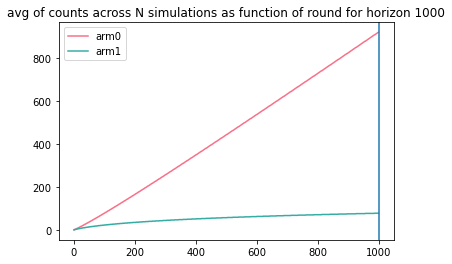

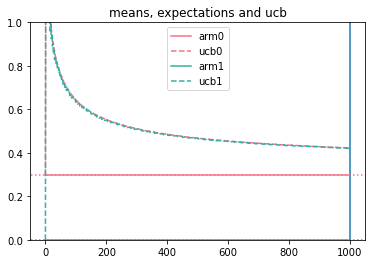

In [13]:
g = Graph(data, change_times, change_values, 2, 1)
g.plot_cumulative_count()
g.plot_means()
soa = g.wrong_arm_picked_list()

In [15]:
soa = g.wrong_arm_picked_list()
len(soa)

78

Checking for very small difference in arms if my "theorem" is true

In [32]:
alg = UCB1(2, 2)
data, change_times, change_values = sim.run_simulation(1000, initial_arms=[0.3, 0], N=1, changes_times=[],
                                changes_values=[[]], save=False, algo=alg, deterministic=True)

In [49]:
g = Graph(data, change_times, change_values, 2, 1)
g.plot_cumulative_count()
g.plot_means()
g.plot_ucb_difference()
soa = g.wrong_arm_picked_list()

KeyboardInterrupt: 

In [48]:
for i in range(len(soa)-1):
    if soa[i] == soa[i+1] - 1:
        print("contradiction")
print(soa)

[  1   3   6   9  12  15  19  23  26  30  35  39  44  48  53  58  64  69
  75  80  86  93  99 106 113 120 127 135 142 150 159 167 176 185 194 204
 214 224 235 245 257 268 280 292 304 317 330 344 358 372 387 402 418 434
 450 467 485 503 521 540 560 580 600 621 643 665 688 712 736 761 787 813
 840 868 896 926 956 987]


guess: the subsequence $u_t_k = |UCB_1(t_k)-UCB_2(t_k)|$ is decreasing and also $u_t_k > u_t $ $\forall t>t_k$

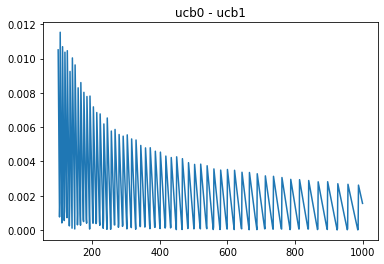

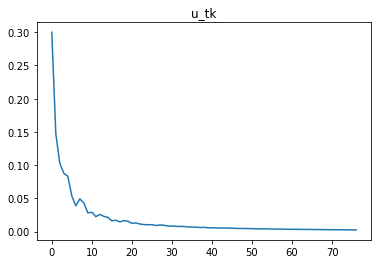

In [50]:
u_t = data["ucb0"] - data["ucb1"]
plt.plot(range(100, len(u_t)), np.abs(u_t[100:]))
plt.title(f"ucb0 - ucb1")
plt.show()
soa = np.array(soa)
plt.plot(range(len(u_t[soa][1:])), np.abs(u_t[soa][1:]))
plt.title("u_tk")
plt.show()

In [55]:
u_tk = np.abs(u_t[soa]).to_numpy()
c = 0
for i in range(len(u_tk)-1):
    if u_tk[i] < u_tk[i+1]:
        print(f"false, i = {i}")
        c += 1≥
print(c)

false, i = 7
false, i = 10
false, i = 12
false, i = 16
false, i = 18
false, i = 21
false, i = 25
false, i = 27
false, i = 30
false, i = 33
false, i = 38
false, i = 40
false, i = 43
false, i = 48
false, i = 53
false, i = 57
false, i = 61
false, i = 73
18


# Trying a version of UCB that explores in √T rate compared to normal ucb

plot cumulative count


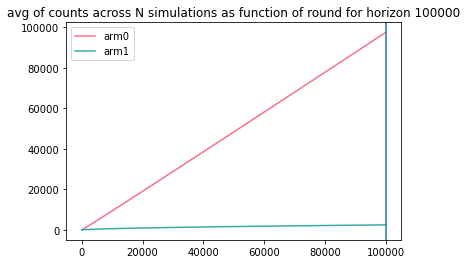

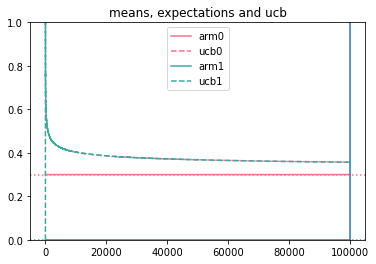

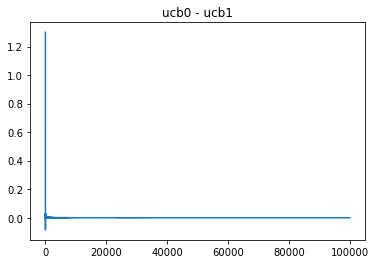

2482


In [3]:
def root_radius_func(t, c):
        return math.sqrt((math.sqrt(t)) / float(c))
square_root_UCB = UCB(2, root_radius_func)
alg = UCB1(2, 2)
data, change_times, change_values = sim.run_simulation(100000, initial_arms=[0.3, 0], N=1, changes_times=[],
                                changes_values=[[]], save=False, algo=square_root_UCB, deterministic=True)
g = Graph(data, change_times, change_values, 2, 1)
g.plot_cumulative_count()
g.plot_means()
g.plot_ucb_difference()
soa = g.wrong_arm_picked_list()
print(len(soa))

plot cumulative count


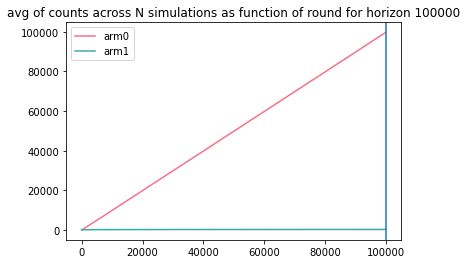

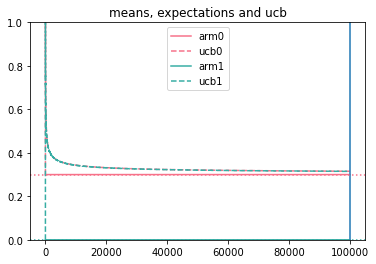

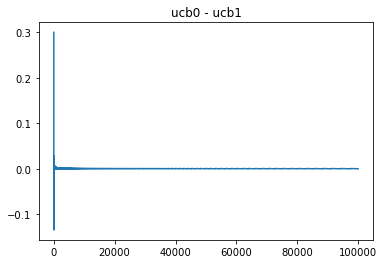

232

In [8]:
alg = UCB1(2, 2)
data, change_times, change_values = sim.run_simulation(100000, initial_arms=[0.3, 0], N=1, changes_times=[],
                                changes_values=[[]], save=False, algo=alg, deterministic=True)
g = Graph(data, change_times, change_values, 2, 1)
g.plot_cumulative_count()
g.plot_means()
g.plot_ucb_difference()
soa = g.wrong_arm_picked_list()
len(soa)

plot cumulative count


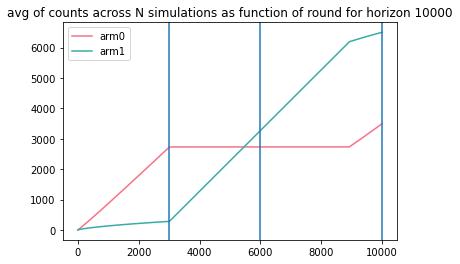

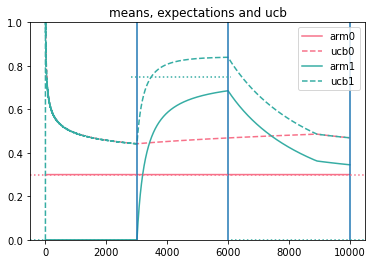

plot cumulative count


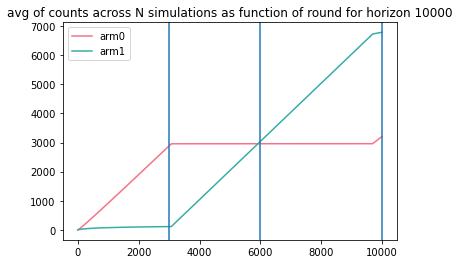

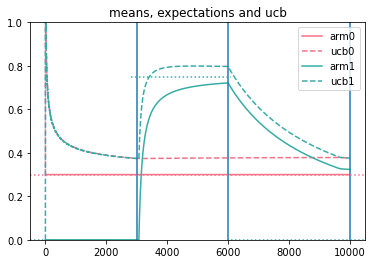

In [4]:
data, change_times, change_values = sim.run_simulation(10000, initial_arms=[0.3,0], N=1, changes_times=[0.3, 0.6],
                        changes_values=[[0.3,0.75], [0.3,0]], save=False, algo=square_root_UCB, deterministic=True)

g1 = Graph(data, change_times, change_values, 2, 1)
g1.plot_cumulative_count()
g1.plot_means()

data, change_times, change_values = sim.run_simulation(10000, initial_arms=[0.3,0], N=1, changes_times=[0.3, 0.6],
                        changes_values=[[0.3,0.75], [0.3,0]], save=False, algo=alg, deterministic=True)

g1 = Graph(data, change_times, change_values, 2, 1)
g1.plot_cumulative_count()
g1.plot_means()

d_ucb = DUCB(2, 2, 1-0.25*math.sqrt(2/10000))
data, change_times, change_values = sim.run_simulation(10000, initial_arms=[0.3,0], N=1, changes_times=[0.3, 0.6],
                        changes_values=[[0.3,0.75], [0.3,0]], save=False, algo=alg, deterministic=True)

g1 = Graph(data, change_times, change_values, 2, 1)
g1.plot_cumulative_count()
g1.plot_means()

It performs a little bit better but still not as I'd expect